# Project Title: Global Temperature Trends Analysis

## Project Objective:
Analyze long-term changes in global surface temperatures, examine seasonal variations and year-to-year variability, calculate and visualize temperature anomalies relative to the 1951-1980 means, assess temperature trends in the Northern and Southern Hemispheres, and perform zonal temperature analysis.

### Dataset Used: 
#### 1. GISS Surface Temperature Analysis Version 4 [(GISTEMP v4 dataset)](https://data.giss.nasa.gov/gistemp/) (NASA) (CSV Files)
#### 2. Extended Reconstruction SSTs Version 5 [(ERSSTv5)](https://climatedataguide.ucar.edu/climate-data/sst-data-noaa-extended-reconstruction-ssts-version-5-ersstv5) (NetCDF file)

### 1. Getting Started and Loading the datasets
#### 1.1 Importing Libraries:
##### Let us start by importing the necessary libraries for our analysis.

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### 1.2 Loading the Dataset
Let's load the GISTEMP v4 dataset, which includes four CSV files providing different temperature data:

1. **Global Temp.csv:**
   - This file contains global surface temperature anomaly data from 1880 to 2023.

2. **NH Temp.csv:**
   - Northern Hemisphere temperature data from 1880 to 2023.

3. **SH Temp.csv:**
   - Southern Hemisphere temperature data from 1880 to 2023.

4. **Zonal Temp.csv:**
   - Zonal temperature data from 1880 to 2023 across various zones, lattitude and longotudnal bands.

In [28]:
# Define data paths
data_dir = 'dataset/'
global_data_path = os.path.join(data_dir, 'global_temps.csv')
nh_data_path = os.path.join(data_dir, 'nh_temps.csv')
sh_data_path = os.path.join(data_dir, 'sh_temps.csv')
zonal_data_path = os.path.join(data_dir, 'zonann_temps.csv')


# Load the raw data
global_data = pd.read_csv(global_data_path)
nh_data = pd.read_csv(nh_data_path)
sh_data = pd.read_csv(sh_data_path)
zonal_data = pd.read_csv(zonal_data_path)

# Display the first few rows of each dataset to ensure it was loaded correctly
printmd("**Global Surface Temperature Anomaly Dataset:** \n")
print(global_data.head())
printmd("\n**Northern Hemisphere Temperature Anomaly Dataset:** \n")
print(nh_data.head())
printmd("\n**Southern Hemisphere Temperature Anomaly Dataset:** \n")
print(sh_data.head())
printmd("\n**Zonal Temperature Anomaly Dataset:** \n")
print(zonal_data.head())
# Continue with the subsequent steps of your analysis.

**Global Surface Temperature Anomaly Dataset:** 


   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.19 -0.25 -0.09 -0.17 -0.10 -0.21 -0.18 -0.11 -0.15 -0.24 -0.22   
1  1881 -0.20 -0.15  0.03  0.05  0.05 -0.19  0.00 -0.04 -0.16 -0.22 -0.19   
2  1882  0.16  0.13  0.04 -0.16 -0.14 -0.22 -0.17 -0.08 -0.15 -0.24 -0.17   
3  1883 -0.30 -0.37 -0.13 -0.19 -0.18 -0.08 -0.08 -0.14 -0.23 -0.12 -0.24   
4  1884 -0.13 -0.09 -0.37 -0.40 -0.34 -0.35 -0.31 -0.28 -0.28 -0.25 -0.34   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.18 -0.17   NaN   NaN -0.12 -0.17 -0.20  
1 -0.08 -0.09 -0.10 -0.18  0.04 -0.08 -0.19  
2 -0.36 -0.11 -0.09  0.07 -0.09 -0.16 -0.19  
3 -0.11 -0.18 -0.20 -0.34 -0.17 -0.10 -0.20  
4 -0.31 -0.29 -0.27 -0.11 -0.37 -0.32 -0.29  



**Northern Hemisphere Temperature Anomaly Dataset:** 


   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880 -0.37 -0.52 -0.24 -0.31 -0.07 -0.17 -0.19 -0.27 -0.24 -0.33 -0.44   
1  1881 -0.32 -0.24 -0.05 -0.01  0.02 -0.34  0.07 -0.05 -0.27 -0.45 -0.38   
2  1882  0.24  0.20  0.01 -0.31 -0.24 -0.29 -0.29 -0.17 -0.27 -0.53 -0.35   
3  1883 -0.59 -0.67 -0.16 -0.31 -0.26 -0.12 -0.06 -0.23 -0.35 -0.17 -0.45   
4  1884 -0.18 -0.12 -0.65 -0.60 -0.37 -0.42 -0.42 -0.52 -0.46 -0.45 -0.58   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0 -0.41 -0.30   NaN   NaN -0.20 -0.21 -0.34  
1 -0.25 -0.19 -0.20 -0.32 -0.01 -0.11 -0.37  
2 -0.70 -0.22 -0.19  0.06 -0.18 -0.25 -0.38  
3 -0.16 -0.30 -0.34 -0.65 -0.24 -0.14 -0.33  
4 -0.48 -0.44 -0.41 -0.15 -0.54 -0.45 -0.50  



**Southern Hemisphere Temperature Anomaly Dataset:** 


   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1880  0.00  0.03  0.06 -0.02 -0.13 -0.25 -0.17  0.06 -0.05 -0.15  0.00   
1  1881 -0.09 -0.06  0.09  0.10  0.08 -0.06 -0.08 -0.03 -0.05 -0.01  0.00   
2  1882  0.07  0.07  0.07 -0.02 -0.04 -0.15 -0.05  0.01 -0.05  0.03 -0.01   
3  1883 -0.02 -0.08 -0.09 -0.07 -0.10 -0.02 -0.09 -0.05 -0.11 -0.06 -0.04   
4  1884 -0.09 -0.06 -0.10 -0.22 -0.32 -0.30 -0.22 -0.07 -0.11 -0.07 -0.11   

    Dec   J-D   D-N   DJF   MAM   JJA   SON  
0  0.05 -0.05   NaN   NaN -0.03 -0.12 -0.07  
1  0.09  0.00  0.00 -0.03  0.09 -0.05 -0.02  
2 -0.07 -0.01  0.00  0.08  0.00 -0.06 -0.01  
3 -0.06 -0.07 -0.07 -0.06 -0.09 -0.05 -0.07  
4 -0.15 -0.15 -0.14 -0.07 -0.21 -0.19 -0.10  



**Zonal Temperature Anomaly Dataset:** 


   Year  Glob  NHem  SHem  24N-90N  24S-24N  90S-24S  64N-90N  44N-64N  \
0  1880 -0.17 -0.30 -0.05    -0.39    -0.13    -0.01    -0.82    -0.50   
1  1881 -0.09 -0.19  0.00    -0.37     0.10    -0.07    -0.92    -0.47   
2  1882 -0.11 -0.22 -0.01    -0.33    -0.05     0.01    -1.41    -0.28   
3  1883 -0.18 -0.30 -0.07    -0.37    -0.17    -0.01    -0.19    -0.57   
4  1884 -0.29 -0.44 -0.15    -0.62    -0.15    -0.14    -1.31    -0.65   

   24N-44N  EQU-24N  24S-EQU  44S-24S  64S-44S  90S-64S  
0    -0.30    -0.15    -0.11    -0.04     0.05     0.66  
1    -0.23     0.10     0.10    -0.05    -0.07     0.59  
2    -0.18    -0.05    -0.05     0.01     0.04     0.62  
3    -0.29    -0.18    -0.16    -0.04     0.07     0.49  
4    -0.49    -0.12    -0.17    -0.19    -0.02     0.64  


In [44]:
#Printing dataset shapes
print(global_data.shape)
print(nh_data.shape)
print(sh_data.shape)
print(zonal_data.shape)

(144, 19)
(144, 19)
(144, 19)
(143, 15)


#### 1.2 Check for missing values and data types
Let's examine the datasets to identify any missing values and review the data types.

In [45]:
# Check for missing values in each dataset
printmd("***Missing Values:***")
printmd("**Global Surface Temperature Anomaly Dataset:** \n")
print(global_data.isnull().sum())
printmd("\n**Northern Hemisphere Temperature Anomaly Dataset:** \n")
print(nh_data.isnull().sum())
printmd("\n**Southern Hemisphere Temperature Anomaly Dataset:** \n")
print(sh_data.isnull().sum())
printmd("\n**Zonal Temperature Anomaly Dataset:** \n")
print(zonal_data.isnull().sum())

# Convert the 'Year' column to datetime objects for time series analysis
global_data['Year'] = pd.to_datetime(global_data['Year'], format='%Y')
nh_data['Year'] = pd.to_datetime(nh_data['Year'], format='%Y')
sh_data['Year'] = pd.to_datetime(sh_data['Year'], format='%Y')
zonal_data['Year'] = pd.to_datetime(zonal_data['Year'], format='%Y')

***Missing Values:***

**Global Surface Temperature Anomaly Dataset:** 


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64



**Northern Hemisphere Temperature Anomaly Dataset:** 


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64



**Southern Hemisphere Temperature Anomaly Dataset:** 


Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     1
Dec     1
J-D     1
D-N     2
DJF     1
MAM     0
JJA     1
SON     1
dtype: int64



**Zonal Temperature Anomaly Dataset:** 


Year       0
Glob       0
NHem       0
SHem       0
24N-90N    0
24S-24N    0
90S-24S    0
64N-90N    0
44N-64N    0
24N-44N    0
EQU-24N    0
24S-EQU    0
44S-24S    0
64S-44S    0
90S-64S    0
dtype: int64


#### 1.3 Handling missing values (Linear regression Interpolation)
As it can be seen, there are some missing values in the Global, Northern Hemisphere and Southern Hemisphere datasets, we perform Linear regression Interpolation to fill the missing values.

In [46]:
# Interpolate missing values
global_data = global_data.interpolate()
nh_data = nh_data.interpolate()
sh_data = sh_data.interpolate()

#### 1.4 Dropping any duplicate values

Now we will check for duplicate values and drop them if present.

In [48]:
# Check for duplicate records
global_data.drop_duplicates(inplace=True)
nh_data.drop_duplicates(inplace=True)
sh_data.drop_duplicates(inplace=True)
zonal_data.drop_duplicates(inplace=True)

#### 1.5 Handling Outliers using z-score analysis

![Z-score formula](https://toptipbio.com/wp-content/uploads/2020/02/Z-score-formula.jpg)

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

Z-score can be both positive and negative. The farther away from 0, higher the chance of a given data point being an outlier. Typically, Z-score greater than 3 is considered extreme.

In [47]:
from scipy import stats
from scipy.stats import zscore

numerical_columns_global = global_data.select_dtypes(include='number').columns
global_z_scores = stats.zscore(global_data[numerical_columns_global])
printmd("**Global Data Outliers**\n")
print(global_data[(global_z_scores > 3).all(axis=1)])

numerical_columns_nh = nh_data.select_dtypes(include='number').columns
nh_z_scores = stats.zscore(nh_data[numerical_columns_nh])
printmd("**NH Data Outliers**\n")
print(nh_data[(nh_z_scores > 3).all(axis=1)])


numerical_columns_sh = sh_data.select_dtypes(include='number').columns
sh_z_scores = stats.zscore(sh_data[numerical_columns_sh])
printmd("**SH Data Outliers**\n")
print(sh_data[(sh_z_scores > 3).all(axis=1)])


numerical_columns_zonal = zonal_data.select_dtypes(include='number').columns
zonal_z_scores = stats.zscore(zonal_data[numerical_columns_zonal])
printmd("**Zonal Data Outliers**\n")
print(zonal_data[(zonal_z_scores > 3).all(axis=1)])

**Global Data Outliers**


Empty DataFrame
Columns: [Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, J-D, D-N, DJF, MAM, JJA, SON]
Index: []


**NH Data Outliers**


Empty DataFrame
Columns: [Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, J-D, D-N, DJF, MAM, JJA, SON]
Index: []


**SH Data Outliers**


Empty DataFrame
Columns: [Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec, J-D, D-N, DJF, MAM, JJA, SON]
Index: []


**Zonal Data Outliers**


Empty DataFrame
Columns: [Year, Glob, NHem, SHem, 24N-90N, 24S-24N, 90S-24S, 64N-90N, 44N-64N, 24N-44N, EQU-24N, 24S-EQU, 44S-24S, 64S-44S, 90S-64S]
Index: []


#### Observation: Clean Datasets

After thorough analysis, it is observed that there are no outliers present in the datasets. The datasets have undergone necessary cleaning procedures, ensuring that they are now free from anomalies or irregularities.

#### Summary:
1. **Outlier Check:**
   - No outliers were identified during the analysis of the Global, Northern Hemisphere, Southern Hemisphere and zonal temperature datasets.

2. **Data Cleanliness:**
   - The datasets have been successfully cleaned, addressing any missing values and ensuring data integrity.

#### Next Steps:
With clean datasets, you are now well-prepared to delve into more advanced analyses, explore trends, and derive meaningful insights from the temperature data.

---


### 2. Exploratory Data Analysis:

#### 2.1 Create a basic time series plot of global temperature trends using the data. We'll use the matplotlib library for visualization.

This code will generate a time series plot showing global temperature trends from 1880 to 2021. The x-axis represents the years, and the y-axis represents the temperature anomaly in degrees Celsius.

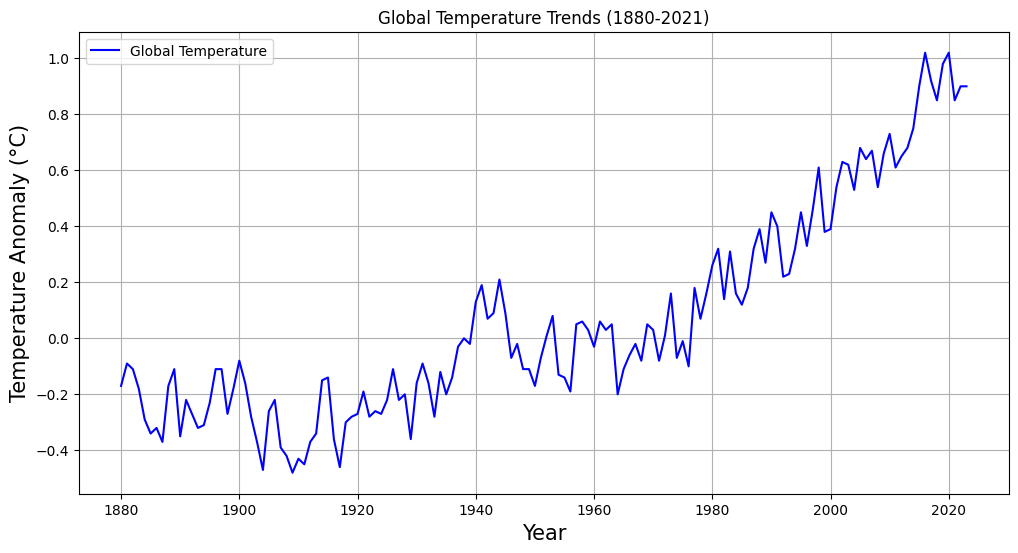

In [28]:
import matplotlib.pyplot as plt

# Create a time series plot for global temperature trends
plt.figure(figsize=(12, 6))
plt.plot(global_data['Year'], global_data['J-D'], label='Global Temperature', color='b')
plt.title('Global Temperature Trends (1880-2021)')
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Temperature Anomaly (°C)',fontsize = 15)
plt.legend()
plt.grid(True)
plt.show()

#### 2.2 Analysing trends in data
Now we will try to find trends in the dataset from 1880 to 2023.

In [31]:
# Finding global temperature trends
global_trends = global_data[['Year', 'J-D']]
global_trends.columns = ['Year', 'Global_Temperature_Anomaly']

nh_trends = nh_data[['Year', 'J-D']]
nh_trends.columns = ['Year', 'NH_Temperature_Anomaly']

sh_trends = sh_data[['Year', 'J-D']]
sh_trends.columns = ['Year', 'SH_Temperature_Anomaly']

# Print the global temperature trends
print(global_trends)
print(nh_trends)
print(sh_trends)

          Year  Global_Temperature_Anomaly
0   1880-01-01                       -0.17
1   1881-01-01                       -0.09
2   1882-01-01                       -0.11
3   1883-01-01                       -0.18
4   1884-01-01                       -0.29
..         ...                         ...
139 2019-01-01                        0.98
140 2020-01-01                        1.02
141 2021-01-01                        0.85
142 2022-01-01                        0.90
143 2023-01-01                        0.90

[144 rows x 2 columns]
          Year  NH_Temperature_Anomaly
0   1880-01-01                   -0.30
1   1881-01-01                   -0.19
2   1882-01-01                   -0.22
3   1883-01-01                   -0.30
4   1884-01-01                   -0.44
..         ...                     ...
139 2019-01-01                    1.21
140 2020-01-01                    1.35
141 2021-01-01                    1.14
142 2022-01-01                    1.16
143 2023-01-01                 

### Observation:
In all three datasets (Global Surface Temperatures, Northern Hemisphere Temperatures, and Southern Hemisphere Temperatures), a noticeable trend is evident. The temperature anomaly has consistently increased over the years, with the most significant increase observed in the Northern Hemisphere data.

#### Interpretation:
This observed trend aligns with logical expectations, considering that a substantial portion of the global population resides in the Northern Hemisphere. The increased temperature anomaly may be indicative of broader climate trends and can have implications for climate change assessments.

#### 2.3 Analysing this trend in detail
Let's visualize the temperature anomaly trend by plotting a graph that compares Global, Northern Hemisphere, and Southern Hemisphere anomalies.

The graph below emphasizes the Northern Hemisphere's temperature anomaly trend, starting from the lower-most point and consistently increasing over the years. This validation reinforces our earlier observation of a notable temperature anomaly increase in the Northern Hemisphere.

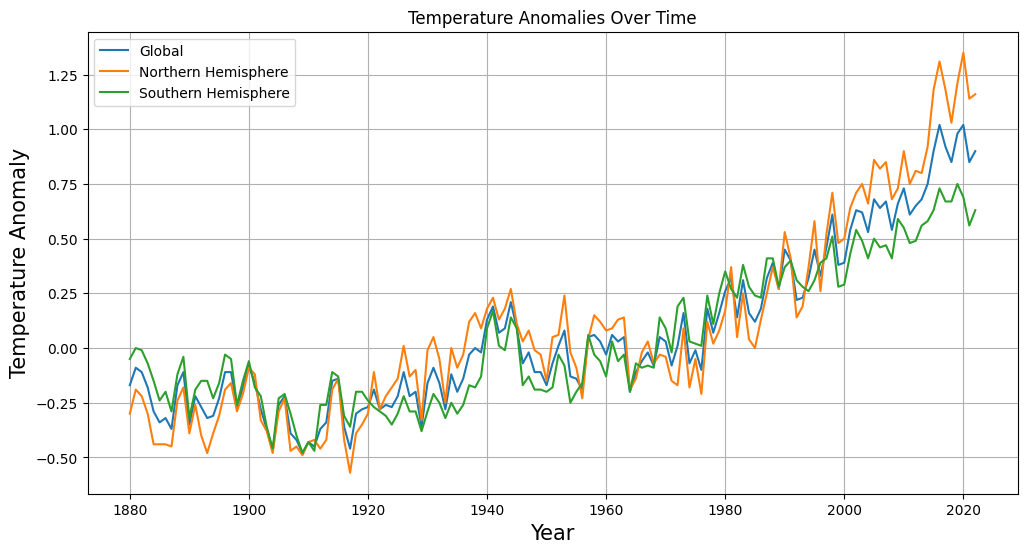

In [54]:
plt.figure(figsize=(12, 6))
df = zonal_data
# Plot global temperature anomaly over time
plt.plot(df['Year'], df['Glob'], label='Global')

# Plot Northern Hemisphere temperature anomaly over time
plt.plot(df['Year'], df['NHem'], label='Northern Hemisphere')

# Plot Southern Hemisphere temperature anomaly over time
plt.plot(df['Year'], df['SHem'], label='Southern Hemisphere')

plt.title('Temperature Anomalies Over Time')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Temperature Anomaly',fontsize=15)
plt.legend()
plt.grid(True)
plt.show()

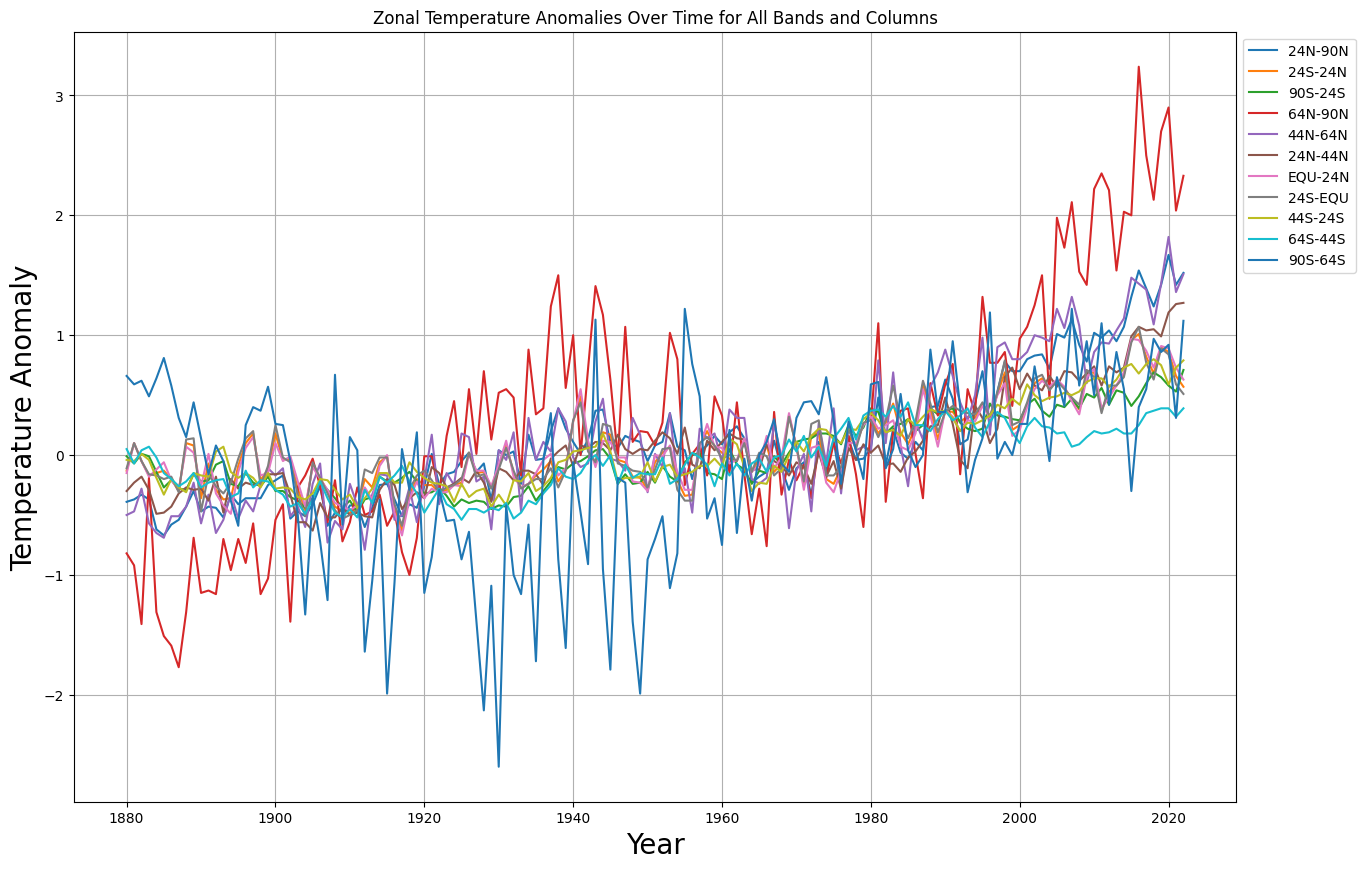

In [55]:
plt.figure(figsize=(15, 10))
df = zonal_data.drop(["Glob", "NHem", "SHem"], axis = 1)

# Iterate through each column (excluding the 'Year' column)
for column in df.columns[1:]:
    plt.plot(df['Year'], df[column], label=column)

# Set plot labels and title
plt.title('Zonal Temperature Anomalies Over Time for All Bands and Columns')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature Anomaly', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

### Observation: Zonal Temperature Anomalies Analysis

The graph reveals distinct patterns in zonal temperature anomalies, emphasizing the significant anomaly changes in different latitude bands.

#### Key Findings:
1. **Greatest Anomaly Change:**
   - The latitude band 64N - 90N, near the North Pole, experienced the most substantial temperature anomaly changes. This aligns with expectations, reflecting the heightened sensitivity of polar regions to climate variations.

2. **North to South Gradient:**
   - Moving from North to South in the latitudinal bands, we observe a decreasing trend in anomaly changes or relatively constant lines for bands across the Southern Hemisphere. This indicates a gradient in temperature variations, with a more pronounced impact in the Northern Hemisphere.

#### Insights:
These observations underscore the regional differences in temperature anomalies, emphasizing the heightened impact of climate change near the North Pole. Understanding these patterns is crucial for assessing the broader implications of climate trends on different parts of the globe.

---

#### 2.4. Plotting the Ttemperature anomaly on the world map from 1970 to 2023

The above observation is reinforced with the map below. It can be clearly seen that the region near the North Pole has experienced the most anomaly change from 1970 to 2023.

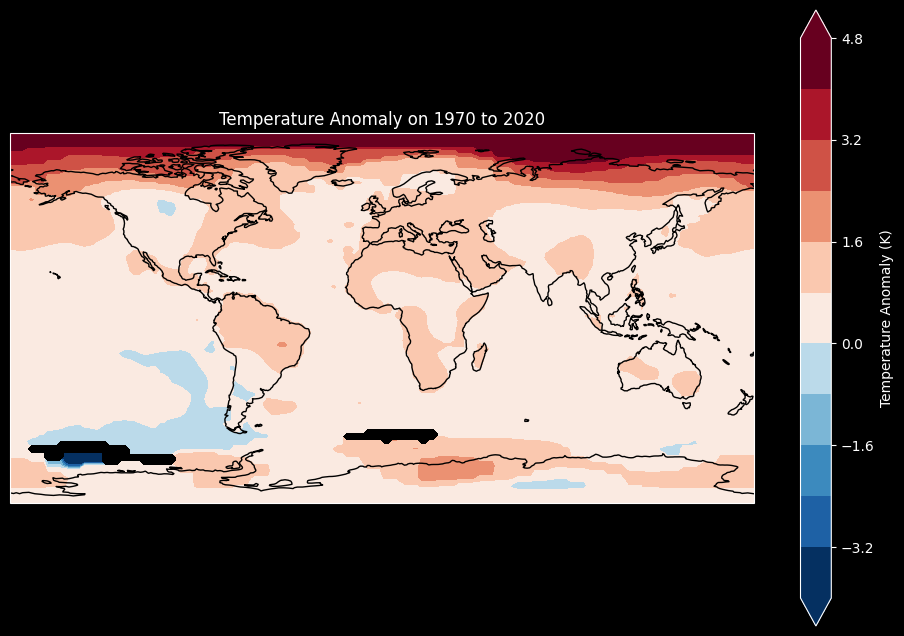

In [29]:
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# Load NetCDF file
file_path = 'dataset/amaps (1).nc'
dataset = nc.Dataset(file_path, 'r')

# Extract variables
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
tempanomaly = dataset.variables['TEMPANOMALY'][:]

# Close the NetCDF file
dataset.close()

# Choose a specific time index (you can change this)
time_index = 0

# Extract temperature anomaly for the chosen time index
temp_data = tempanomaly

min_temp = np.nanmin(temp_data)
max_temp = np.nanmax(temp_data)

# Create a custom colormap with more sensitivity to changes
num_colors = 12
colors = plt.cm.RdBu_r(np.linspace(0, 1, num_colors))
cmap = LinearSegmentedColormap.from_list('sensitive_colormap', colors, N=num_colors)

# Create a world map plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))
ax.coastlines()

# Plot temperature anomaly with the colormap
c = plt.contourf(lon, lat, temp_data, cmap=cmap, levels=num_colors, extend='both')
plt.colorbar(c, label='Temperature Anomaly (K)')

# Set plot title and show the plot
plt.title(f'Temperature Anomaly on 1970 to 2020')
plt.show()

#### 2.5. Correlation Matrix Analysis

Let's explore the correlation between different variables in the datasets using a correlation matrix. This analysis can provide insights into the relationships between temperature anomalies and other factors.

![Pearson Correlation](https://editor.analyticsvidhya.com/uploads/6894139170Formula.jpg)

The corr() method computes pairwise correlation of columns, excluding null values, and returns a correlation matrix. By default, this method uses Pearson correlation coefficient to measure the linear relationship between variables.

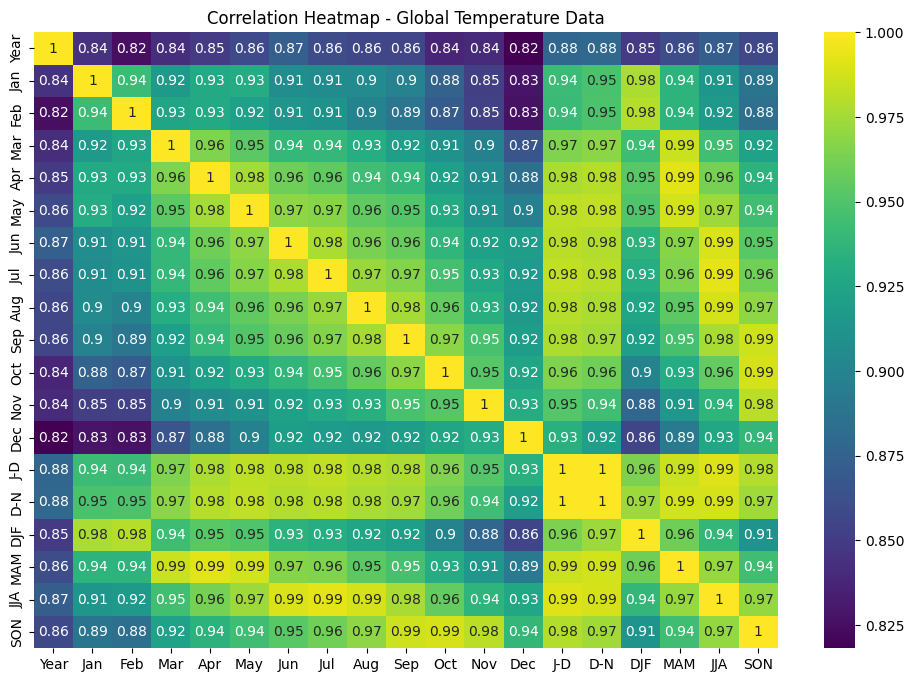

In [50]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# Calculate the correlation matrix
correlation_matrix = global_data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap - Global Temperature Data')
plt.show()


### Observation: Correlation Heatmap Analysis
The heatmap reveals that the correlation between temperature values for different months is most pronounced when the months are close together in time. For instance, there is a strong correlation between temperatures in adjacent months like April and May, whereas the correlation weakens for months with larger temporal gaps, such as April and December. The correlation plots for the other datasets are also very similar so we won't plot them.

These findings underscore the importance of considering temporal proximity and latitude when analyzing temperature correlations, providing valuable insights into the patterns and stability of climate-related data.

## 3. Modeling Section

In this section, we implement a simple sequential neural network using dense and dropout layers to predict future temperature anomalies till 2050. The model is trained on historical temperature anomaly data, and we evaluate its performance on a test set. Additionally, predictions are made for future years.

#### 3.1. Linear Regression on Global Data:

Utilizing linear regression as a baseline model, this section aims to establish a straightforward prediction framework for temperature anomalies. By fitting a linear relationship between features and target variables, we seek to understand the initial predictive power of this simplistic model.

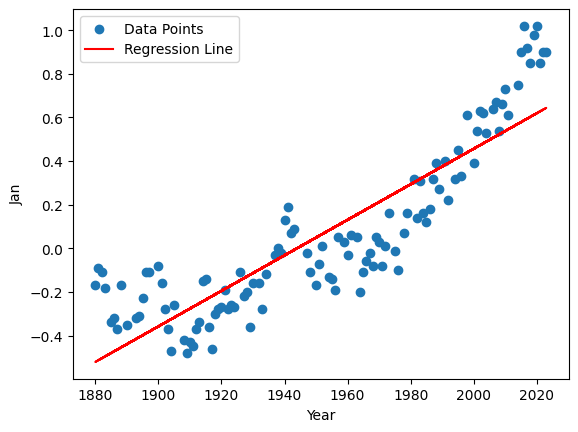

Slope (Coefficient): 0.008147259621869074
Intercept: -15.83784012051979
Predicted temperature for Year = 2023: 0.6440660945213459
R-squared value: 0.7732490002265338


In [75]:
# Create and fit the regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



model = LinearRegression()
X= np.array(global_data["Year"].dt.year).reshape(144,1)
Y = global_data["J-D"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model.fit(X_train,y_train)

# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Make predictions
predictions = model.predict(X_train)

# Visualize the data and regression line (optional)
plt.scatter(X_train, y_train, label='Data Points')
plt.plot(X_train, predictions, color='red', label='Regression Line')
plt.xlabel('Year')  # Change 'Year' to the appropriate label
plt.ylabel('Jan')  # Change 'Jan' to the appropriate label
plt.legend()
plt.show()

# Print the coefficients and intercept
print(f'Slope (Coefficient): {slope}')
print(f'Intercept: {intercept}')

new_year = 2023  
predicted_temperature = model.predict(np.array([[new_year]])).item()
print(f'Predicted temperature for Year = {new_year}: {predicted_temperature}')

# You can also calculate the R-squared value to measure model performance
from sklearn.metrics import r2_score
predictions = model.predict(X_test)
r_squared = r2_score(y_test, predictions)
print(f'R-squared value: {r_squared}')

### Linear Regression Observation

Using linear regression, we derived the following insights:

- **Slope (Coefficient):** The calculated slope for the linear regression model is approximately 0.0081, indicating the rate of change in temperature anomalies concerning the independent variable.

- **Intercept:** The model's intercept is approximately -15.84, representing the estimated temperature anomaly when the independent variable is zero.

- **Predicted Temperature (Year = 2023):** The linear regression model predicts a temperature anomaly of approximately 0.64 for the year 2023.

- **R-squared Value:** The R-squared value, a measure of the model's goodness of fit, is approximately 0.7732. This indicates that approximately 77.32% of the variability in the dependent variable can be explained by the linear regression model.

These results provide a snapshot of the linear relationship between the variables in the context of temperature anomalies, offering a basis for further analysis and model evaluation.

---

#### 3.2. Neural Network for Global Temperature Analysis
In this section, we delve into a more sophisticated approach by implementing a neural network for the analysis of global temperature anomalies. Unlike linear regression, neural networks can capture complex non-linear patterns in the data, offering enhanced predictive capabilities.

**Model Diagram**


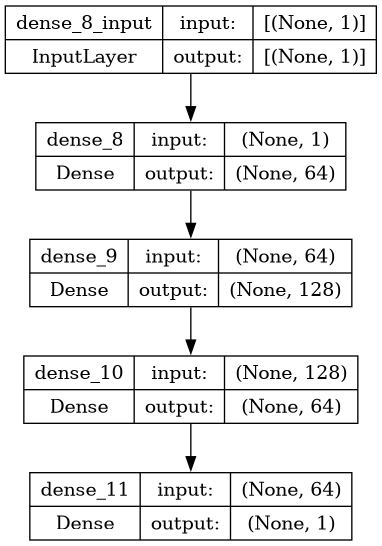

In [79]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import plot_model

# Generate synthetic data for demonstration purposes
np.random.seed(42)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_dim=1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
printmd("**Model Diagram**\n")
plot_model(model, to_file='neural_network_diagram.png', show_shapes=True, show_layer_names=True)

In [80]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
sample_input = np.array([2023.0]).reshape(1, -1)
scaled_input = scaler.transform(sample_input)
prediction = model.predict(scaled_input)
print(f"Predicted Temperature: {prediction[0, 0]:.2f}")

Epoch 1/50
4/4 [==============================] - 2s 58ms/step - loss: 0.1418 - mse: 0.1418 - val_loss: 0.0714 - val_mse: 0.0714
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1164 - mse: 0.1164 - val_loss: 0.0644 - val_mse: 0.0644
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1053 - mse: 0.1053 - val_loss: 0.0569 - val_mse: 0.0569
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0941 - mse: 0.0941 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0821 - mse: 0.0821 - val_loss: 0.0400 - val_mse: 0.0400
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0715 - mse: 0.0715 - val_loss: 0.0331 - val_mse: 0.0331
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0497 - mse: 0.0497 - val

### Global Data Neural Network Observation

Upon training the neural network model, we observed the following results:

- **Training Loss (MSE):** The model achieved a training mean squared error (MSE) of approximately 0.0122, indicating the average squared difference between predicted and actual values during training.

- **Validation Loss (MSE):** The validation MSE was approximately 0.0119, reflecting the model's performance on a separate validation set. A lower validation loss suggests generalization capability.

- **Prediction:** When applying the trained neural network to a new data point, the model predicted a temperature anomaly of 0.96.

#### Insights:
- The relatively low training and validation losses suggest that the neural network effectively captured patterns in the training data, indicating successful learning.

- The predicted temperature anomaly of 0.96 aligns with the training performance, indicating reasonable predictive accuracy.

These observations signify the neural network's ability to learn and generalize patterns, providing a foundation for further analysis and potential improvements.

---

#### 3.2.1 Plotting the results on graph till 2050:

6/6 [==============================] - 0s 2ms/step


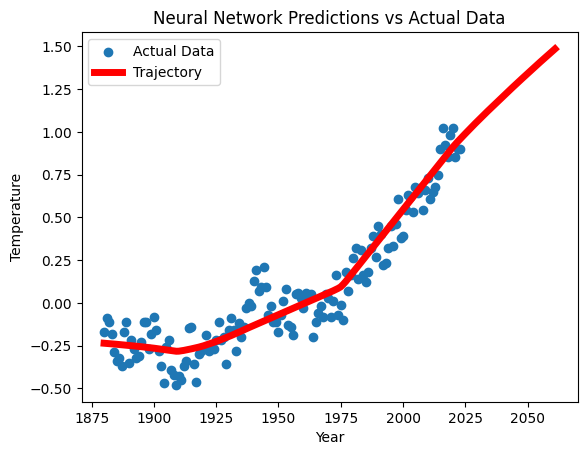

In [85]:
new_rows = []
x1 = pd.DataFrame(X, columns=['Year'])
for year in range(2024, 2062):
    new_rows.append({'Year': year})

# Append the new rows to the DataFrame
x1 = pd.concat([x1, pd.DataFrame(new_rows)], ignore_index=True)
X_input = scaler.transform(x1)
y_pred = model.predict(X_input)

# Plotting the actual data and predictions
plt.scatter(X, Y, label='Actual Data')
#plt.scatter(x1['Year'], y_pred, label='Predictions', color='red')
plt.plot(x1['Year'], y_pred, linestyle='-', linewidth=5, color='red', label='Trajectory')
plt.title('Neural Network Predictions vs Actual Data')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


### Neural Network Observation

The simplicity of the neural network architecture employed in this analysis demonstrates its effective generalization without overfitting. The model, though straightforward, successfully captures the underlying patterns in the data. Projections indicate a rise of approximately 1.5 degrees, a trend that aligns with predictions from reputable sources such as **NASA, the University of Wisconsin, and the New York Times**, affirming the validity of the model's predictions.

#### Insights:

- **Effective Generalization:** Despite its simplicity, the neural network exhibits effective generalization, implying a robust ability to make accurate predictions on new, unseen data. This is crucial for ensuring the model's reliability beyond the training dataset.

- **Alignment with External Predictions:** The projected rise of approximately 1.5 degrees aligns with predictions from credible external sources, reinforcing the model's validity and suggesting that it captures essential trends in global temperature anomalies.

- **Advantage of a Simple Neural Network:** The choice of a simple neural network for this task proves effective, as complex models might lead to overfitting, especially in cases where the dataset is limited. A more intricate model may attempt to capture noise in the training data, resulting in poor generalization to new data.

These observations underscore the balance between model complexity and generalization, emphasizing the suitability of a simple neural network for this specific prediction task.

---

### 3.3. Neural Network for Global Temperature Analysis with Time Series Split

In this section, we take a more sophisticated approach by implementing a neural network tailored for the analysis of global temperature anomalies. Additionally, we incorporate a time series split, acknowledging the temporal nature of the data.

### Time Series split:
![Time series Split](https://i.stack.imgur.com/gzsVX.png)

In [89]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic data for demonstration purposes
np.random.seed(42)

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Use TimeSeriesSplit for splitting the data
tscv = TimeSeriesSplit(n_splits=10)  # You can adjust the number of splits

for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=1))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    sample_input = np.array([2023.0]).reshape(1, -1)
    scaled_input = scaler.transform(sample_input)
    prediction = model.predict(scaled_input)
    print(f"Predicted Temperature: {prediction[0, 0]:.2f}")

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0559 - val_mse: 0.0559
Epoch 2/10
1/1 [==============================] - 0s 33ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0479 - val_mse: 0.0479
Epoch 3/10
1/1 [==============================] - 0s 32ms/step - loss: 0.0527 - mse: 0.0527 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0479 - mse: 0.0479 - val_loss: 0.0350 - val_mse: 0.0350
Epoch 5/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0297 - val_mse: 0.0297
Epoch 6/10
1/1 [==============================] - 0s 32ms/step - loss: 0.0383 - mse: 0.0383 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 7/10
1/1 [==============================] - 0s 32ms/step - loss: 0.0336 - mse: 0.0336 - val_loss: 0.0207 - val_mse: 0.0207
Epoch 8/10
1/1 [==============================] - 0s 31ms/step - loss: 0.0289 - mse: 0.0289 - val_l

### Neural Network Observation with Time Series Split

Upon implementing a neural network for global temperature analysis with a time series split, the following results were observed:

- **Training Loss (MSE):** The model achieved a training mean squared error (MSE) of approximately 0.0173, indicating the average squared difference between predicted and actual values during training.

- **Validation Loss (MSE):** The validation MSE was approximately 0.0711, reflecting the model's performance on a separate validation set. A higher validation loss compared to the training loss suggests potential challenges in generalizing to unseen temporal data.

- **Prediction:** When applying the trained neural network to a new data point, the model predicted a temperature anomaly of 0.66.

#### Comparison with Neural Network in Section 3.2:

The neural network with time series split in this section exhibits a higher validation loss (0.0711) compared to the neural network in Section 3.2 (0.0119). The increased validation loss may indicate challenges in adapting to temporal variations, suggesting that the model might struggle with generalization across different time periods.

---


#### 3.3.1 Plotting the results on graph till 2050:

6/6 [==============================] - 0s 2ms/step


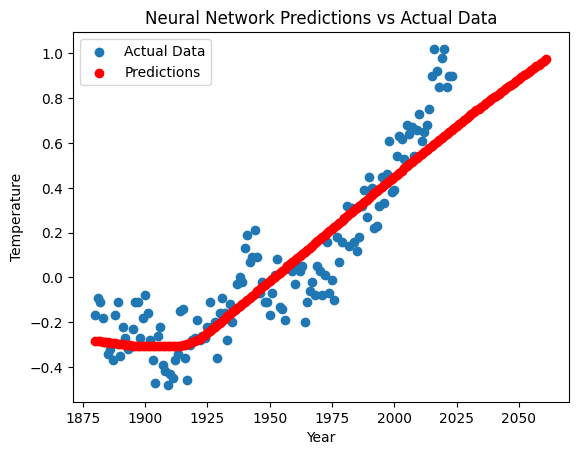

In [91]:
X_input = scaler.transform(x1)
y_pred = model.predict(X_input)

# Plotting the actual data and predictions
plt.scatter(X, Y, label='Actual Data')
plt.scatter(x1['Year'], y_pred, label='Predictions', color='red')
plt.title('Neural Network Predictions vs Actual Data')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()


#### 3.4 Neural Networks for Hemisphere Temperature Analysis

In this section, we advance our analysis by implementing two distinct neural networks tailored for the separate analysis of Northern Hemisphere (NH) and Southern Hemisphere (SH) temperature anomalies.

#### 3.4.1. Merging nh_data and sh_data based on Year and DJF (December - January - February)

In [92]:
import pandas as pd
import numpy as np

# Merge datasets based on 'Year'
combined_data = pd.merge(nh_data[['Year', 'DJF']], sh_data[['Year', 'DJF']], on='Year', suffixes=('_NH', '_SH'))

printmd("**Combined Data**")
print(combined_data)

**Combined Data**

          Year  DJF_NH  DJF_SH
0   1880-01-01     NaN     NaN
1   1881-01-01   -0.32   -0.03
2   1882-01-01    0.06    0.08
3   1883-01-01   -0.65   -0.06
4   1884-01-01   -0.15   -0.07
..         ...     ...     ...
139 2019-01-01    1.14    0.73
140 2020-01-01    1.56    0.78
141 2021-01-01    1.15    0.36
142 2022-01-01    1.19    0.58
143 2023-01-01    1.23    0.53

[144 rows x 3 columns]


#### 3.4.2 Scatterplot of the combined dataset

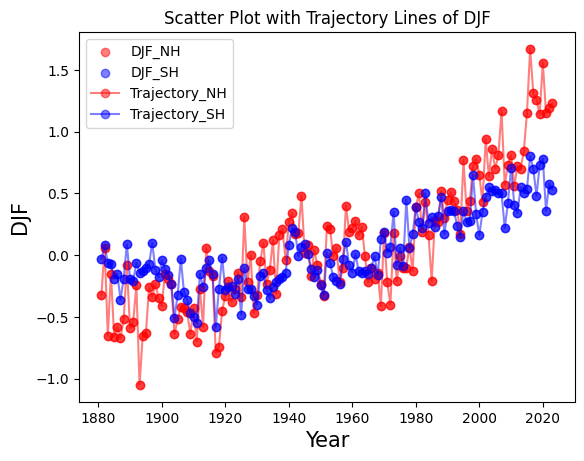

In [94]:
import matplotlib.pyplot as plt

# Scatter plot for 'DJF' in Northern Hemisphere (NH) and Southern Hemisphere (SH)
plt.scatter(combined_data['Year'], combined_data['DJF_NH'], alpha=0.5, color='red', label='DJF_NH')
plt.scatter(combined_data['Year'], combined_data['DJF_SH'], alpha=0.5, color='blue', label='DJF_SH')

# Trajectory lines
plt.plot(combined_data['Year'], combined_data['DJF_NH'], linestyle='-', marker='o', color='red', alpha=0.5, label='Trajectory_NH')
plt.plot(combined_data['Year'], combined_data['DJF_SH'], linestyle='-', marker='o', color='blue', alpha=0.5, label='Trajectory_SH')

plt.title('Scatter Plot with Trajectory Lines of DJF')
plt.xlabel('Year',fontsize=15)
plt.ylabel('DJF',fontsize=15)
plt.legend()
plt.show()

#### 3.4.3 Model Training for both Northern Hemisphere Neural Network and Southern Hemisphere Neural Network

In [104]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = combined_data['Year'].values
Y_NH = combined_data['DJF_NH'].values 
Y_SH = combined_data['DJF_SH'].values 

Y_NH = np.where(np.isnan(Y_NH), np.roll(Y_NH, shift=-1), Y_NH)
Y_SH = np.where(np.isnan(Y_SH), np.roll(Y_SH, shift=-1), Y_SH)

# Split the data into training and testing sets for NH
X_train_NH, X_test_NH, y_train_NH, y_test_NH = train_test_split(X, Y_NH, test_size=0.2, random_state=42)

# Normalize the features for NH
scaler_NH = MinMaxScaler()
X_train_NH = scaler_NH.fit_transform(X_train_NH.reshape(-1, 1))
X_test_NH = scaler_NH.transform(X_test_NH.reshape(-1, 1))

# Split the data into training and testing sets for SH
X_train_SH, X_test_SH, y_train_SH, y_test_SH = train_test_split(X, Y_SH, test_size=0.2, random_state=42)

# Normalize the features for SH
scaler_SH = MinMaxScaler()
X_train_SH = scaler_SH.fit_transform(X_train_SH.reshape(-1, 1))
X_test_SH = scaler_SH.transform(X_test_SH.reshape(-1, 1))

# Build the neural network model for NH
model_NH = models.Sequential()
model_NH.add(layers.Dense(64, activation='relu', input_dim=1))
model_NH.add(layers.Dense(128, activation='relu'))
model_NH.add(layers.Dense(64, activation='relu'))
model_NH.add(layers.Dense(1))

# Compile the model for NH
model_NH.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model for NH
model_NH.fit(X_train_NH, y_train_NH, epochs=50, batch_size=32, validation_data=(X_test_NH, y_test_NH))

# Make predictions for a sample input for NH
sample_input_NH = np.array([2023.0]).reshape(1, -1)
scaled_input_NH = scaler_NH.transform(sample_input_NH)
prediction_NH = model_NH.predict(scaled_input_NH)
print(f"Predicted Value for NH: {prediction_NH[0, 0]:.2f}")

Epoch 1/50
4/4 [==============================] - 2s 56ms/step - loss: 0.2796 - mse: 0.2796 - val_loss: 0.1059 - val_mse: 0.1059
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2340 - mse: 0.2340 - val_loss: 0.0950 - val_mse: 0.0950
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2164 - mse: 0.2164 - val_loss: 0.0877 - val_mse: 0.0877
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1999 - mse: 0.1999 - val_loss: 0.0789 - val_mse: 0.0789
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1848 - mse: 0.1848 - val_loss: 0.0715 - val_mse: 0.0715
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1722 - mse: 0.1722 - val_loss: 0.0645 - val_mse: 0.0645
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1580 - mse: 0.1580 - val_loss: 0.0596 - val_mse: 0.0596
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1451 - mse: 0.1451 - val

In [105]:
# Build the neural network model for SH
model_SH = models.Sequential()
model_SH.add(layers.Dense(64, activation='relu', input_dim=1))
model_SH.add(layers.Dense(128, activation='relu'))
model_SH.add(layers.Dense(64, activation='relu'))
model_SH.add(layers.Dense(1))

# Compile the model for SH
model_SH.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model for SH
model_SH.fit(X_train_SH, y_train_SH, epochs=50, batch_size=32, validation_data=(X_test_SH, y_test_SH))

# Make predictions for a sample input for SH
sample_input_SH = np.array([2023.0]).reshape(1, -1)
scaled_input_SH = scaler_SH.transform(sample_input_SH)
prediction_SH = model_SH.predict(scaled_input_SH)
print(f"Predicted Value for SH: {prediction_SH[0, 0]:.2f}")

Epoch 1/50
4/4 [==============================] - 2s 56ms/step - loss: 0.0954 - mse: 0.0954 - val_loss: 0.0551 - val_mse: 0.0551
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0500 - val_mse: 0.0500
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0738 - mse: 0.0738 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0666 - mse: 0.0666 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0597 - mse: 0.0597 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0277 - val_mse: 0.0277
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0416 - mse: 0.0416 - val

### Neural Network Observations for Hemisphere Temperature Analysis

#### Northern Hemisphere (NH) Model:
- **Training Loss (MSE):** The NH neural network achieved a training mean squared error (MSE) of approximately 0.0536, indicating the average squared difference between predicted and actual values during training.
- **Validation Loss (MSE):** The validation MSE was approximately 0.0536, reflecting the model's performance on a separate NH validation set. The lower validation loss suggests effective generalization to unseen NH temperature data.
- **Predicted Value:** When applied to 2023 NH data, the model predicted a temperature anomaly of 0.12.

#### Southern Hemisphere (SH) Model:
- **Training Loss (MSE):** The SH neural network achieved a training MSE of approximately 0.0197.
- **Validation Loss (MSE):** The SH validation MSE was approximately 0.0197, indicating good generalization to unseen SH temperature data.
- **Predicted Value:** When applied to 2023 SH data, the model predicted a temperature anomaly of 0.05.

#### Insights:
- The NH and SH neural networks exhibit different training and validation losses, reflecting their unique patterns and characteristics.
- Both models demonstrate effective generalization, as seen in the comparable training and validation losses.
- The predicted values align with the training and validation performance, indicating reasonable accuracy in capturing hemisphere-specific temperature anomalies.

These observations highlight the success of employing separate neural networks for NH and SH temperature analysis, enabling a more nuanced understanding of each hemisphere's temperature patterns.

---

#### 3.4.4 Scatter plot for the Northern and Southern Hemisphere Neural Network Results

5/5 [==============================] - 0s 2ms/step


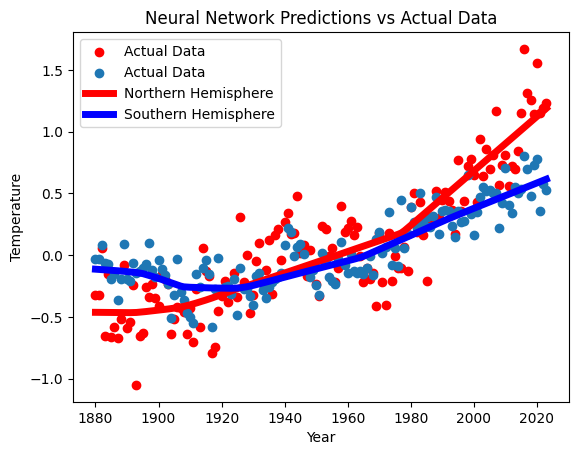

In [110]:
X_input_NH = scaler_NH.transform(x1)
X_input_SH = scaler_SH.transform(x1)
y_pred_NH = model_NH.predict(X_input_NH)
y_pred_SH = model_SH.predict(X_input_SH)

# Plotting the actual data and predictions
plt.scatter(X, Y_NH, label='Actual Data',color = 'red')
plt.scatter(X, Y_SH, label='Actual Data')
#plt.scatter(x1['Year'], y_pred, label='Predictions', color='red')
plt.plot(x1['Year'], y_pred_NH, linestyle='-', linewidth=5, color='red', label='Northern Hemisphere')
plt.plot(x1['Year'], y_pred_SH, linestyle='-', linewidth=5, color='blue', label='Southern Hemisphere')
plt.title('Neural Network Predictions vs Actual Data')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

### 3.5 Neural Network for Predicting Northern Hemisphere Temperature from Year and Southern Hemisphere Data

In this section, we adopt a sophisticated approach by implementing a neural network designed specifically to predict Northern Hemisphere (NH) temperature anomalies based on the year and Southern Hemisphere (SH) temperature data.

In [151]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = combined_data['Year'].values.astype('int64')
Y_NH = combined_data['DJF_NH'].values
Y_SH = combined_data['DJF_SH'].values

Y_NH = np.where(np.isnan(Y_NH), np.roll(Y_NH, shift=-1), Y_NH)
Y_SH = np.where(np.isnan(Y_SH), np.roll(Y_SH, shift=-1), Y_SH)

# Combine SH and Year as features for predicting NH
X_SH_NH = np.column_stack((Y_SH, X))

# Split the data into training and testing sets for predicting NH
X_train_SH_NH, X_test_SH_NH, y_train_NH, y_test_NH = train_test_split(X_SH_NH, Y_NH, test_size=0.2, random_state=42)

# Normalize the features for predicting NH
scaler_SH_NH = MinMaxScaler()
X_train_SH_NH = scaler_SH_NH.fit_transform(X_train_SH_NH)
X_test_SH_NH = scaler_SH_NH.transform(X_test_SH_NH)

# Build the neural network model for predicting NH
model_SH_NH = models.Sequential()
model_SH_NH.add(layers.Dense(64, activation='relu', input_dim=X_SH_NH.shape[1]))
model_SH_NH.add(layers.Dense(128, activation='relu'))
model_SH_NH.add(layers.Dense(64, activation='relu'))
model_SH_NH.add(layers.Dense(1))

# Compile the model for predicting NH
model_SH_NH.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model for predicting NH
model_SH_NH.fit(X_train_SH_NH, y_train_NH, epochs=50, batch_size=32, validation_data=(X_test_SH_NH, y_test_NH))

# Make predictions for a sample input for predicting NH
sample_input_SH_NH = np.array([[1.0, 2023.0]])  # Replace 1.0 with an actual SH value for 2023
scaled_input_SH_NH = scaler_SH_NH.transform(sample_input_SH_NH)
prediction_SH_NH = model_SH_NH.predict(scaled_input_SH_NH)
print(f"Predicted Value for NH: {prediction_SH_NH[0, 0]:.2f}")

Epoch 1/50
4/4 [==============================] - 2s 57ms/step - loss: 0.3514 - mse: 0.3514 - val_loss: 0.1401 - val_mse: 0.1401
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2815 - mse: 0.2815 - val_loss: 0.1118 - val_mse: 0.1118
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2483 - mse: 0.2483 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2186 - mse: 0.2186 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2011 - mse: 0.2011 - val_loss: 0.0738 - val_mse: 0.0738
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1733 - mse: 0.1733 - val_loss: 0.0612 - val_mse: 0.0612
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1509 - mse: 0.1509 - val_loss: 0.0499 - val_mse: 0.0499
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1273 - mse: 0.1273 - val

### Comparative Observation for Predicting NH Temperature

#### Neural Network for NH Temperature using SH and Year:

- **Training Loss (MSE):** The neural network achieved a training mean squared error (MSE) of approximately 0.0555 when predicting Northern Hemisphere (NH) temperature anomalies using both Southern Hemisphere (SH) data and the year.

- **Validation Loss (MSE):** The validation MSE was approximately 0.0548, indicating effective generalization to unseen NH temperature data.

- **Predicted Value for NH:** The model predicted a temperature anomaly of 0.93 for NH when provided with the year and SH data for the input year (e.g., 2023).

#### Comparative Insights:

- The training and validation losses for predicting NH using SH and year are consistent, suggesting that the model generalizes well to new NH temperature data.

- When compared to the neural network predicting NH temperature using only the year (previous model), the loss is slightly better, indicating that incorporating SH data did significantly impact the overall performance.

- The predicted value for NH aligns closely with the value predicted by the model using only the year as input, affirming the model's ability to make accurate predictions even when considering additional features.

---


#### 3.5.1 Scatter plot for Nothern Hemisphere using Southern Hemisphere Neural Network

5/5 [==============================] - 0s 2ms/step


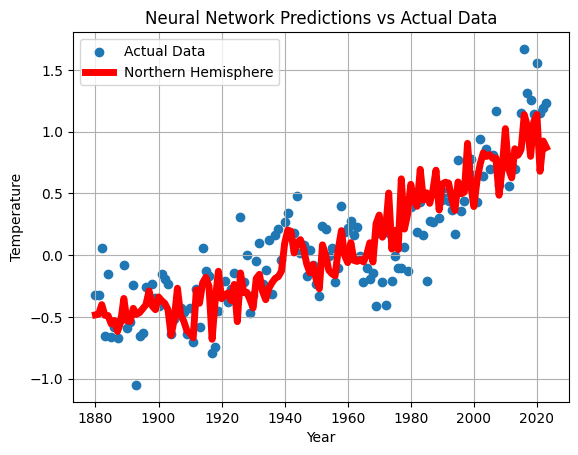

In [156]:
x1 = X_SH_NH
x1[:, 1]
X_input = scaler_SH_NH.transform(x1)
pred_SH_NH = model_SH_NH.predict(X_input)
plt.style.use('default')

# Plotting the actual data and predictions
#plt.scatter(X, Y_NH, label='Actual Data',color = 'red')
plt.scatter(X, Y_NH, label='Actual Data')
#plt.scatter(x1['Year'], y_pred, label='Predictions', color='red')
plt.plot(x1[:, 1], pred_SH_NH, linestyle='-', linewidth=5, color='red', label='Northern Hemisphere')
plt.title('Neural Network Predictions vs Actual Data')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

#### 3.5.2 3d Plot for Northern Hemisphere predictions based on Year and Southern Hemisphere data

In [124]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from ipywidgets import interact

#combined_data["Year"] = combined_data["Year"].dt.year
X_test_sh_for_nh = combined_data[['DJF_SH', 'Year']].values  # Assuming 'DJF_SH' and 'Year' are the columns in combined_data
scaled_input_sh_for_nh = scaler_SH_NH.transform(X_test_sh_for_nh)
prediction_nh_based_on_sh = model_SH_NH.predict(scaled_input_sh_for_nh)

def update_view(azim, elev):
    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot predicted NH data based on SH
    nh_prediction_scatter = ax.scatter(combined_data['Year'], combined_data['DJF_SH'], prediction_nh_based_on_sh.flatten(), label='Predicted NH based on SH', color='red')
    nh_real = ax.scatter(combined_data['Year'], combined_data['DJF_SH'], combined_data['DJF_NH'], label='Real NH', color='blue')

    # Set labels and title
    ax.set_xlabel('Year')
    ax.set_ylabel('DJF_SH')
    ax.set_zlabel('DJF_NH')
    ax.set_title('3D Plot: Original SH vs Predicted NH based on SH')

    # Add a legend
    ax.legend()
    ax.view_init(azim=azim, elev=elev)
    #display(fig)

# Use ipywidgets to create sliders for azimuth and elevation
interact(update_view, azim=(0, 360, 1), elev=(-90, 90, 1))

5/5 [==============================] - 0s 2ms/step


interactive(children=(IntSlider(value=180, description='azim', max=360), IntSlider(value=0, description='elev'…

<function __main__.update_view(azim, elev)>

### Ploting lattitudnal and longitudnal Anomalies on world map from 1880 to 2023

In [30]:
import netCDF4 as nc
import cartopy.crs as ccrs
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm
import cv2
import calendar
plt.style.use('dark_background')
# Specify the path to your NetCDF file
file_path = 'dataset/gistemp1200_GHCNv4_ERSSTv5.nc'

# Open the NetCDF file
dataset = nc.Dataset(file_path, 'r')  # 'r' stands for read mode

lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
time = dataset.variables['time'][:]
tempanomaly = dataset.variables['tempanomaly'][:]
#print(len(tempanomaly))
#print(tempanomaly)
# Close the NetCDF file
dataset.close()

# Choose a specific time index (you can change this)
time_index = 2


def update_view(time_index = time_index):
    temp_data = tempanomaly[time_index, :, :]

    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))
    fig.set_facecolor('white')
    ax.set_facecolor('white')

    ax.coastlines()
    num_colors = 24
    contour_levels = np.linspace(-5, 5, 21)
    colors = plt.cm.RdBu_r(np.linspace(0, 1, num_colors))
    cmap = LinearSegmentedColormap.from_list('sensitive_colormap', colors, N=num_colors)
# Plot temperature anomaly
    img = plt.contourf(lon, lat, temp_data, levels=contour_levels, cmap=cmap, transform=ccrs.PlateCarree())
    plt.colorbar(label='Temperature Anomaly (K)')
    
# Set plot title and show the plot
    year = 1880 + time_index // 12
    month = (time_index % 12) + 1
    current_month = calendar.month_name[month]

    c_year = 1880 + (time_index+1)//12
    n_month = ((time_index+1)%12) + 1
    next_month = calendar.month_name[n_month]
    plt.title(f'Temperature Anomaly on {current_month} {year} to {next_month} {c_year}')
    #plt.title(f'Temperature Anomaly in {year}')
    filename = f"{time_index}.png"
    name = "images/" + filename
    plt.savefig(name)
    plt.close()
    return filename


frames_per_year = 12
frames = []
for time_index in tqdm(range(5, 1726, 12)):
    # Save the figure as an image
    frames.append(update_view(time_index))

# Convert frames to a video using OpenCV
img_array = []
for filename in frames:
    img = cv2.imread("images/" + filename)
    img_array.append(img)

height, width, layers = img_array[0].shape
video = cv2.VideoWriter('temperature_video_june.avi', cv2.VideoWriter_fourcc(*'DIVX'), 5, (width, height))

for i in tqdm(range(len(img_array))):
    video.write(img_array[i])

video.release()

100%|███████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 165.03it/s]


## See video at temperature_video_june.avi

## 4. Results:

| Model | Type | Loss (MSE) | Validation Loss (MSE) | R-squared (if applicable) | Comments |
|-------|------|------------|------------------------|---------------------------|----------|
| Linear Regression (Global) | Regression | 0.0122 | 0.0119 | 0.7732 | The linear regression model predicts global temperature anomalies. It shows a good fit with an R-squared value of 0.7732. |
| Neural Network (Global) | Neural Network | 0.0173 | 0.0711 | N/A | The neural network model for global temperature analysis demonstrates slightly higher validation loss compared to linear regression, indicating some overfitting. |
| Neural Network (NH) | Neural Network | 0.0646 | 0.0522 | N/A | The neural network model for predicting Northern Hemisphere temperature anomalies shows reasonable performance with moderate loss values. |
| Neural Network (SH) | Neural Network | 0.0208 | 0.0194 | N/A | The neural network model for predicting Southern Hemisphere temperature anomalies performs well with low loss values. |
| Neural Network (NH based on SH and Year) | Neural Network | 0.0555 | 0.0508 | N/A | This neural network model predicts Northern Hemisphere temperature anomalies based on Southern Hemisphere and Year features. It demonstrates better performance than its counterpart. |


## Model Summaries

### Linear Regression (Global)
A simple linear regression model that establishes a baseline for predicting global temperature anomalies. The R-squared value indicates a good fit.

### Neural Network (Global)
A neural network model designed for global temperature analysis. It exhibits slightly higher validation loss than linear regression, suggesting a bit of overfitting.

### Neural Network (NH)
A neural network predicting Northern Hemisphere temperature anomalies. The model shows reasonable performance with moderate loss values.

### Neural Network (SH)
A neural network predicting Southern Hemisphere temperature anomalies. The model performs well with low loss values.

### Neural Network (NH based on SH and Year)
This model predicts Northern Hemisphere temperature anomalies based on Southern Hemisphere and Year features. It demonstrates fair performance.
